In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import marching_cubes_lewiner
import numpy as np
from skimage import io
from tifffile import imsave
import glob
import os
from time import time
from tqdm import tqdm
import shutil

def image_show(image, nrows=1, ncols=1, cmap='gray',size = 8):
    
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(size, size))
    ax.imshow(image, cmap=cmap)
    ax.axis('off')
    
    plt.show();
    return fig, ax

def vimg_show(volume, cmap = 'gray', size = 8):
    image_show(volume[volume.shape[0]//2], cmap = cmap, size = size)

In [2]:
file_name_list = ['glands', 'epi_layer', 'dil_lumen']
biopsy_region_file = 'cytobiopsyContour_ds2'

save_folder = 'E:\\Weisi_data\\send_Can_data_070822' #change
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

v2v_folder = 'Z:\\WX\\WX_test_dod\\whobio_sets\\vid2vid_results'
biopsy_group_name_list =['s140_o'] #c
biopsy_group_list = []
for biopsy_group_name in biopsy_group_name_list:
    biopsy_group_list.append(os.path.join(v2v_folder, biopsy_group_name))

print(biopsy_group_list)
print(len(biopsy_group_list))
#########remember to select folders

['Z:\\WX\\WX_test_dod\\whobio_sets\\vid2vid_results\\s140_o']
1


In [3]:
for biopsy_group in biopsy_group_list:

    biopsy_group_dir = biopsy_group+'\\full_seq' #full_seq_dir
    biopsy_list = glob.glob(os.path.join(biopsy_group_dir,'dod_*')) #the block tif folder
    
    for biopsy_dir in biopsy_list:
        
        biopsy_name = os.path.basename(biopsy_dir) #dod+sxxx
        print('----------biopsy_name:', biopsy_name)
        block_name = biopsy_name[4:] #sxxx
        stack_path = biopsy_group_dir+'\\Fused_dod_'+block_name+'\\dod_'+block_name
        
        
        # ------read 3 main features
        print('reading: glands')
        file_name = file_name_list[0]
        file_path = stack_path+'_'+file_name+'.tif'
        binary_glands = (io.imread(file_path)).astype(np.bool)
        
        print('reading: epi_layer')
        file_name = file_name_list[1]
        file_path = stack_path+'_'+file_name+'.tif'
        binary_epi_layer = (io.imread(file_path)).astype(np.bool)
        
        print('reading: dil_lumen')
        file_name = file_name_list[2]
        file_path = stack_path+'_'+file_name+'.tif'
        binary_dil_lumen = (io.imread(file_path)).astype(np.bool)

        #-------read biopsy_region
        print('reading:', biopsy_region_file[:-4])
        file_path = os.path.dirname(stack_path)+'//get_biopsy_outline//'+block_name+'_'+biopsy_region_file+'.tif'
        binary_biopsy_region = (io.imread(file_path)).astype(np.bool)
        
        #save 4 binary 3D array as a compressed npz file
        print('saving 4 binary 3D array as a compressed npz file...')
        np.savez_compressed(os.path.join(save_folder,biopsy_name), \
                            glands=binary_glands, \
                            epithelium=binary_epi_layer, \
                            lumens=binary_dil_lumen, \
                            biopsy_region=binary_biopsy_region)

----------biopsy_name: dod_s140a
reading: glands


C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_14952/3959171069.py:18: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  binary_glands = (io.imread(file_path)).astype(np.bool)


reading: epi_layer


C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_14952/3959171069.py:23: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  binary_epi_layer = (io.imread(file_path)).astype(np.bool)


reading: dil_lumen


C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_14952/3959171069.py:28: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  binary_dil_lumen = (io.imread(file_path)).astype(np.bool)


reading: cytobiopsyContour


C:\Users\ADMINI~1\AppData\Local\Temp\2/ipykernel_14952/3959171069.py:33: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  binary_biopsy_region = (io.imread(file_path)).astype(np.bool)


saving 4 binary 3D array as a compressed npz file...


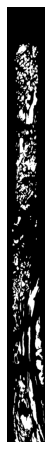

(356, 5888, 512)
bool


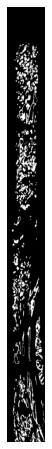

(356, 5888, 512)
bool


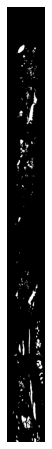

(356, 5888, 512)
bool


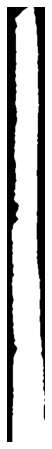

(356, 5888, 512)
bool


In [4]:
#test
save_folder = 'E:\\Weisi_data\\send_Can_data_111620'
with np.load(os.path.join(save_folder, 'dod_s021b.npz')) as data:
    glands = data['glands']
    epithelium = data['epithelium']
    lumens = data['lumens']
    biopsy_region = data['biopsy_region']
    
vimg_show(glands)
print(glands.shape)
print(glands.dtype)

vimg_show(epithelium)
print(epithelium.shape)
print(epithelium.dtype)

vimg_show(lumens)
print(lumens.shape)
print(lumens.dtype)

vimg_show(biopsy_region)
print(biopsy_region.shape)
print(biopsy_region.dtype)